In [1]:
import matplotlib.pyplot as plt
import numpy as np
import idx2numpy
from tqdm import tqdm

In [2]:
test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')
train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
print(test_images.shape)
print(test_labels.shape)
print(train_images.shape)
print(train_labels.shape)

(10000, 28, 28)
(10000,)
(60000, 28, 28)
(60000,)


In [4]:
train_images_flat=train_images.reshape(train_images.shape[0], -1).T
test_images_flat=test_images.reshape(test_images.shape[0], -1).T

In [5]:
print(train_images_flat.shape)
print(test_images_flat.shape)
m = train_images_flat.shape[1]
m_test = test_images_flat.shape[1]
print(f"Train Examples={m}")
print(f"Test Examples={m_test}")
X = train_images_flat/255
X_test = test_images_flat/255

(784, 60000)
(784, 10000)
Train Examples=60000
Test Examples=10000


In [8]:
# Y = train_labels.reshape(train_labels.shape[0],1).T # Y.shape is (1, m)
# Y.shape

(1, 60000)

In [6]:
def one_hot(row_vector, no_classes):
    one_hot_vector = np.eye(no_classes)[row_vector.reshape(-1)]
    return one_hot_vector.T

In [152]:
C = train_labels.max()+1
print(f"No. of Classes={C}")
Y_hot = one_hot(train_labels,no_classes=C)
Y_test_hot = one_hot(test_labels,no_classes=C)
print(Y_hot.shape) #Y_hot.shape is (C,m)
print(Y_test_hot.shape) #Y_hot.shape is (C,m)

No. of Classes=10
(10, 60000)
(10, 10000)


In [64]:
def initialize():
    global W,b
    W = np.random.randn(train_images_flat.shape[0], C)*0.001 # W.shape is (n_x,1)
    b = np.zeros((1,m)) #b.shape is (1,m)
initialize()

In [65]:
print(W.shape)
print(b.shape)

(784, 10)
(1, 60000)


In [66]:
def softmax(z):
    t = np.exp(z)
    a = t / np.sum(t)
    return a

In [67]:
def forward():
    global Z,A
    Z = np.dot(W.T, X) + b # Z.shape is (C,m)
    A = softmax(Z)  # A.shape is (C,m)

In [68]:
def cost():
    global L,J
# Calculate Loss
    L = -np.sum(Y_hot*np.log(A), keepdims=True, axis=0) # L.shape is (1,m)   '''NO BROADCASTING GOING ON HERE'''
    #calculate Cost
    J = np.sum(L, keepdims=True, axis=1)*(1/m) # J.shape is (1,1) 

In [69]:
# deivatives
def backward():
    global dZ, dW, db
    #dJ/dZ
    dZ = A-Y_hot  # dZ.shape is (C,m)   '''BROADCASTING GOING ON HERE'''

    #dJ/dW = sum(dL/dW)/m  which is equivalent to np.dot(X,dZ.T)/m
    '''
    dLdW = X*dZ  # dLdW.shape is (n_x, m)
    dW = np.sum(dLdW, keepdims=True, axis=1)/m  #dW.shape is (n_x,1) [same as W.shape]
    '''
    dW = np.dot(X, dZ.T) / m
    #dJ/db
    db = np.sum(dZ, keepdims=True, axis=1)/m  # db.shape = (1,1)

In [74]:
forward()
cost()
backward()
A.shape, Y_hot.shape, L.shape, J.shape,Z.shape, dZ.shape, W.shape, dW.shape, db.shape

((10, 60000),
 (10, 60000),
 (1, 60000),
 (1, 1),
 (10, 60000),
 (10, 60000),
 (784, 10),
 (784, 10),
 (10, 1))

In [88]:
initialize()

In [89]:
#optimise
alpha = 0.001
iterations = 500
global costs
costs=[]
for i in range(iterations):
    forward()
    if i%5 ==0:
        cost()
        costs.append(J)
        print(f'Cost at {i}th loop = {J}')
    backward()
    W = W - alpha*dW
    b = b - alpha*db

Cost at 0th loop = [[13.30515299]]
Cost at 5th loop = [[13.29974696]]
Cost at 10th loop = [[13.29438038]]
Cost at 15th loop = [[13.28905343]]
Cost at 20th loop = [[13.2837663]]
Cost at 25th loop = [[13.27851918]]
Cost at 30th loop = [[13.27331225]]
Cost at 35th loop = [[13.26814571]]
Cost at 40th loop = [[13.26301974]]
Cost at 45th loop = [[13.25793454]]
Cost at 50th loop = [[13.2528903]]
Cost at 55th loop = [[13.24788723]]
Cost at 60th loop = [[13.24292552]]
Cost at 65th loop = [[13.23800537]]
Cost at 70th loop = [[13.23312699]]
Cost at 75th loop = [[13.22829058]]
Cost at 80th loop = [[13.22349635]]
Cost at 85th loop = [[13.2187445]]
Cost at 90th loop = [[13.21403524]]
Cost at 95th loop = [[13.2093688]]
Cost at 100th loop = [[13.20474537]]
Cost at 105th loop = [[13.20016519]]
Cost at 110th loop = [[13.19562846]]
Cost at 115th loop = [[13.19113541]]
Cost at 120th loop = [[13.18668627]]
Cost at 125th loop = [[13.18228124]]
Cost at 130th loop = [[13.17792058]]
Cost at 135th loop = [[13.1

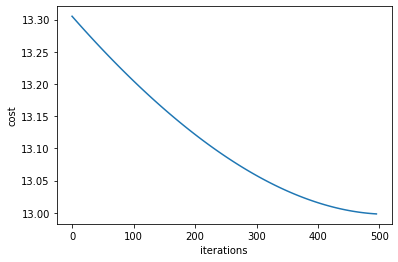

100

In [188]:
plt.plot(np.arange(0,500,5), np.array(costs).reshape(len(costs),1))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()
len(costs)


In [122]:
# A[:,0].max() == A[:,0]
O = (np.max(A,axis=0) == A).T * np.array([0,1,2,3,4,5,6,7,8,9]).T

In [134]:
F = np.sum(O,axis=1)
F,train_labels

(array([3, 0, 4, ..., 8, 0, 8]), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [169]:
print(f'{np.sum(F==train_labels)} images correctly labeled out of {train_labels.shape[0]} for Train Set')

40421 images correctly labeled out of 60000 for Train Set


In [144]:
print(f'Accuracy : {100 - np.mean(np.abs(A- Y_hot))*100} on Train Set')

Accuracy : 89.99989719763204 on Train Set


In [170]:
print(f'Cost for training was {J}')

Cost for training was [[12.99824566]]


In [171]:
# test
Z_test = np.dot(W.T, X_test) + b[:,:10000]
A_test = softmax(Z_test)
L_test = -np.sum(Y_test_hot*np.log(A_test), keepdims=True, axis=0)
J_test = np.sum(L_test, keepdims=True, axis=1)*(1/m)

In [172]:
O_test = (np.max(A_test,axis=0) == A_test).T * np.array([0,1,2,3,4,5,6,7,8,9]).T
F_test = np.sum(O_test,axis=1)
F_test, test_labels

(array([7, 3, 1, ..., 8, 8, 6]), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [174]:
print(f'{np.sum(F_test==test_labels)} images correctly labeled out of {test_labels.shape[0]} for Test Set')

6810 images correctly labeled out of 10000 for Test Set


In [175]:
print(f'Accuracy : {100 - np.mean(np.abs(A_test- Y_test_hot))*100} on Test Set')

Accuracy : 89.99938796067968 on Test Set


In [176]:
print(f'Cost for training was {J_test}')

Cost for training was [[1.86798718]]


The image no. is 9 and my Model predicts 9


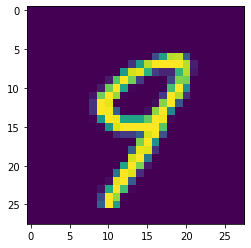

In [185]:
image = 5247
plt.imshow(test_images[image])
print(f'The image no. is {test_labels[image]} and my Model predicts {F_test[image]}')

In [165]:
b[:,:10000].shape

(10, 10000)